<a href="https://colab.research.google.com/github/Gcango/Analise-dos-Incendios-Florestais-no-Brasil/blob/main/Analise_dos_Inc_Florestais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sabendo que Analise de dados procura responder perguntas olhando para um determinado passado, neste exercício, que recoreu-se aos dados do kaggle sobre os incêndios florestais no Brasil no periodo de 1998 a 2017, procurou-se então, depois de uma analise criteriosa dos dados, responder as seguintes questões:
1) - Qual é o número total de incêndios registrados neste periodo?
2) - Em que ano foi reportado o número máximo de incêndios florestais?
3) - Em que mês foi reportado o número máximo de incêndios florestais?
4) - Em que estado foi relatado o número máximo de incêndios florestais?
5) - Encontre o número total de incêndios relatados no Amazonas
6) - Exibir número de incêndios relatados no Amazonas (anualmente)
7) - Exibir número de incêndios relatados no Amazonas (diurno)
8) - Encontre o número total de incêndios relatados em 2015 e visualize os dados com base em cada “mês”
9) - Encontre o número médio de incêndios relatados do maior
para o menor (em termos de estado)
10) - Para encontrar os nomes dos estados onde os incêndios foram 7relatados no mês de 'dezembro'

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
dados = pd.read_csv("/content/amazon.csv",encoding="iso-8859-1", parse_dates=['date'])

In [77]:
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [78]:
#Analisando os dados Existente

In [79]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [80]:
dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [81]:
dados.duplicated().any()

True

In [82]:
dados = dados.drop_duplicates()

In [83]:
dados.duplicated().any()

False

In [84]:
dados.describe(include='all')

<ipython-input-84-32145d35c06a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dados.describe(include='all')


,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


In [85]:
print("A BD tem linhas: ", dados.shape[0])
print("A BD tem Colunas: ", dados.shape[1])

A BD tem linhas:  6422
A BD tem Colunas:  5


In [86]:
#1) - Qual é o número total de incêndios registrados neste periodo?

In [87]:
dados.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [88]:
print(" Neste periodo de 1999 a 2017 foram registados cerca de:",dados.year.count(), "INCÊNDIOS" )

 Neste periodo de 1999 a 2017 foram registados cerca de: 6422 INCÊNDIOS


In [89]:
#2) - Em que ano foi reportado o número máximo de incêndios florestais?

In [90]:
ano_max = dados.groupby('year')['number'].sum().reset_index()
ano_max

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


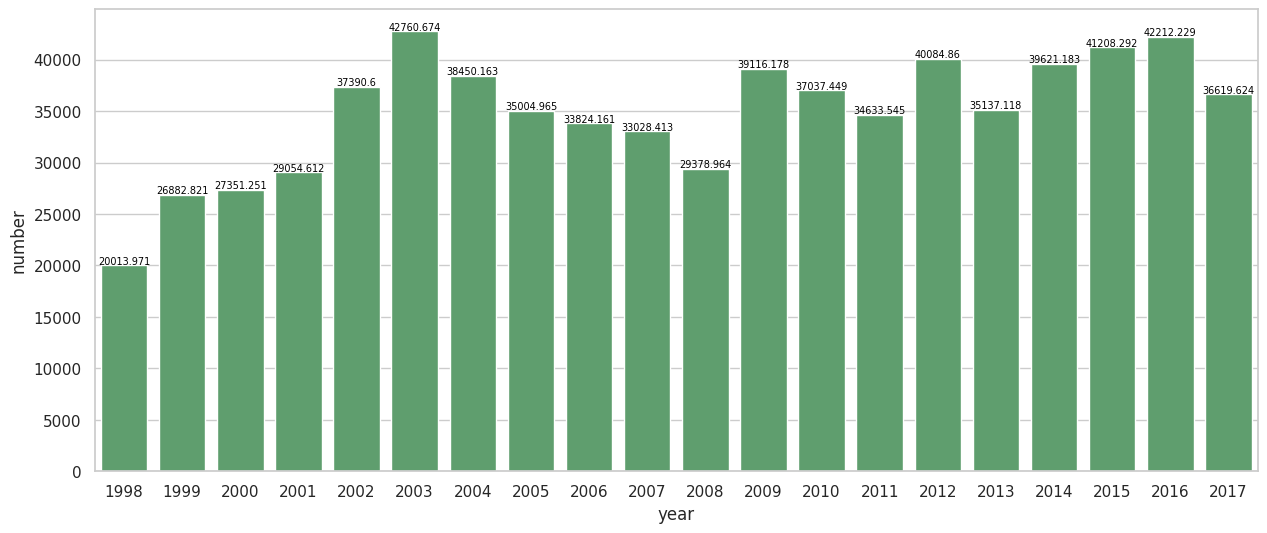

In [91]:
plt.figure(figsize=(15,6))
plot = sns.barplot(x='year', y='number', data =ano_max, color='g')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=7,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.show()

In [106]:
v_maximo = ano_max.number.max()
max_do_ano = ano_max.year[5]
v_minimo = ano_max.number.min()
min_do_ano = ano_max.year[0]

In [104]:
print(f" O ano reportado com maior número de INCÊNDIO foi em {max_do_ano} com um total de {v_maximo} ")
print(f" O ano reportado com maior número de INCÊNDIO foi em {min_do_ano} com um total de {v_minimo} ")

 O ano reportado com maior número de INCÊNDIO foi em 2003 com um total de 42760.674 
 O ano reportado com maior número de INCÊNDIO foi em 1998 com um total de 20013.971 


In [93]:
#3) - Em que mês foi reportado o número máximo de incêndios florestais?

In [94]:
mes_max = dados.groupby('month')['number'].sum().reset_index()
mes_max

,month,number
0,Abril,28184.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30839.050
4,Janeiro,47681.844
5,Julho,92319.113
6,Junho,55997.675
7,Maio,34725.363
8,Março,30709.405
9,Novembro,85508.054


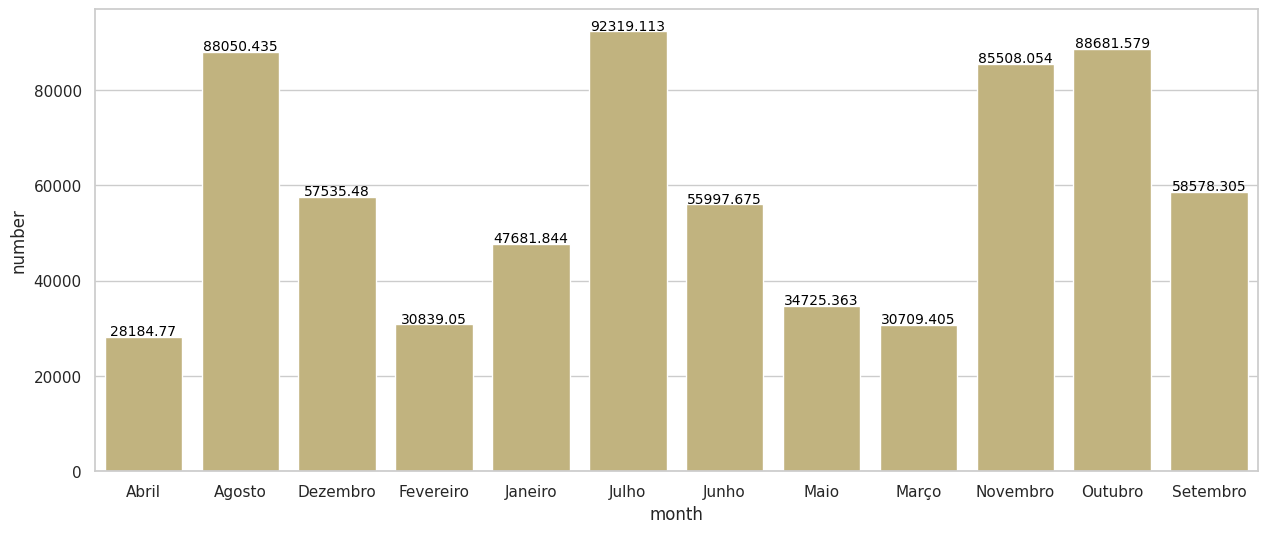

In [95]:
plt.figure(figsize=(15,6))
#sns.set_theme(style="whitegrid")
plot = sns.barplot(x='month', y='number', data = mes_max, color='y')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.show()